## Prototyp (ang. Prototype)

**Typ**: kreacyjny \
**Zakres**: obiektowy

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>prototyp</b> określa na podstawie prototypowanego egzemplarza rodzaje tworzonych obiektów i generuje nowe obiekty przez kopiowanie tego prototypu.
</div>

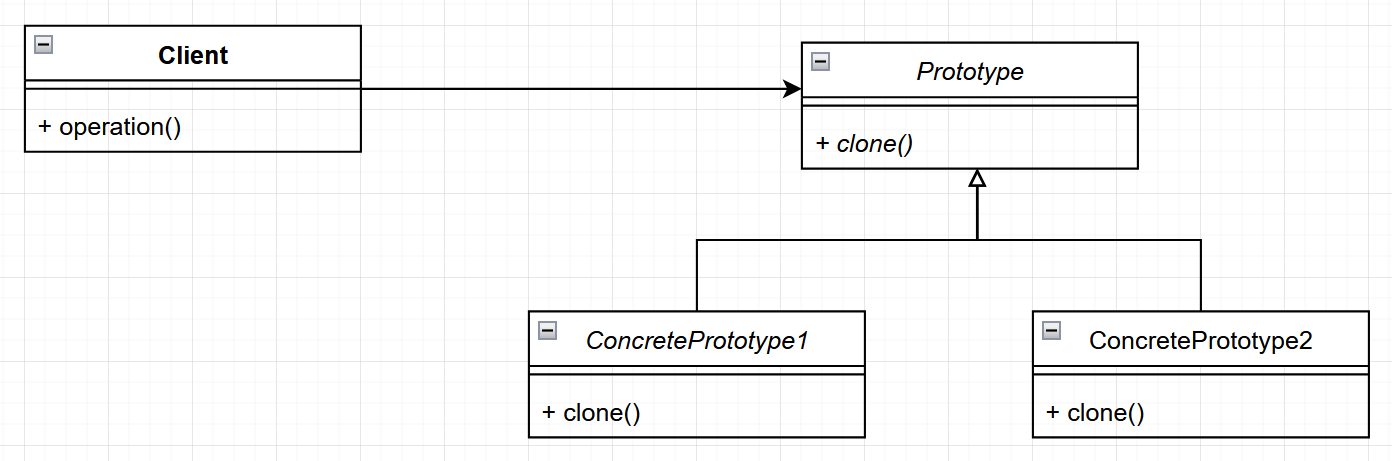

Wyobraźmy sobie, że tworzymy grę, w której mamy różne typy potworów. Każdy potwór ma złożoną konfigurację - statystyki, ekwipunek, umiejętności itp., a jego inicjalizacja jest kosztowna.

In [3]:
import time

class Monster:
    def __init__(self, name, health, damage, armor, weapons, skills):
        self.name = name
        self.health = health
        self.damage = damage
        self.armor = armor
        self.weapons = weapons  # lista broni
        self.skills = skills    # lista umiejętności
        time.sleep(3)  # symulacja kosztownej inicjalizacji
    
    def display(self):
        print(f"Potwór: {self.name}")
        print(f"  Zdrowie: {self.health}")
        print(f"  Obrażenia: {self.damage}")
        print(f"  Pancerz: {self.armor}")
        print(f"  Broń: {self.weapons}")
        print(f"  Umiejętności: {self.skills}")

In [4]:
# Tworzenie pierwszego orka
orc1 = Monster(
    name="Ork Wojownik",
    health=100,
    damage=20,
    armor=10,
    weapons=["Miecz", "Topór"],
    skills=["Atak wirowy", "Krzyk bojowy"]
)

orc1.display()

Potwór: Ork Wojownik
  Zdrowie: 100
  Obrażenia: 20
  Pancerz: 10
  Broń: ['Miecz', 'Topór']
  Umiejętności: ['Atak wirowy', 'Krzyk bojowy']


Działa. Ale co jeśli chcemy stworzyć 50 orków z podobną konfiguracją? Musimy za każdym razem powtarzać całą inicjalizację. Co więcej, jeśli proces tworzenia potwora jest kosztowny (np. ładowanie zasobów z bazy danych, skomplikowane obliczenia), to staje się to bardzo nieefektywne.

In [5]:
# Tworzenie wielu podobnych orków - NIEEFEKTYWNE
orc2 = Monster(
    name="Ork Wojownik",
    health=100,
    damage=20,
    armor=10,
    weapons=["Miecz", "Topór"],  # Powtarzamy te same dane!
    skills=["Atak wirowy", "Krzyk bojowy"]
)

orc3 = Monster(
    name="Ork Wojownik",
    health=100,
    damage=20,
    armor=10,
    weapons=["Miecz", "Topór"],  # Znowu powtarzamy!
    skills=["Atak wirowy", "Krzyk bojowy"]
)

# ... i tak 50 razy!

Jak to rozwiązać?

Zamiast tworzyć każdy obiekt od zera, możemy **sklonować** istniejący obiekt. Stworzymy jeden "prototypowy" ork, a następnie będziemy go kopiować. To właśnie robi wzorzec Prototyp!

### Pierwsza próba - proste klonowanie

In [11]:
import copy
import time


class Monster:
    def __init__(self, name, health, damage, armor, weapons, skills):
        self.name = name
        self.health = health
        self.damage = damage
        self.armor = armor
        self.weapons = weapons
        self.skills = skills
        time.sleep(3)        

    #TODO: implementacja metody clone
    
    def display(self):
        print(f"Potwór: {self.name}")
        print(f"  Zdrowie: {self.health}")
        print(f"  Broń: {self.weapons}")
        print(f"  Umiejętności: {self.skills}")

In [14]:
# Tworzenie prototypu - pierwszy raz jest kosztowny
orc_prototype = Monster(
    name="Ork Wojownik",
    health=100,
    damage=20,
    armor=10,
    weapons=["Miecz", "Topór"],
    skills=["Atak wirowy", "Krzyk bojowy"]
)
# ale pozostałe już szybkie.

In [15]:
# Klonowanie - łatwe i szybkie!
# TODO: usage

Ork 1:
Potwór: Ork Wojownik
  Zdrowie: 100
  Broń: ['Miecz', 'Topór']
  Umiejętności: ['Atak wirowy', 'Krzyk bojowy']

Ork 2:
Potwór: Ork Wojownik
  Zdrowie: 100
  Broń: ['Miecz', 'Topór']
  Umiejętności: ['Atak wirowy', 'Krzyk bojowy']


In [ ]:
print("Ork 1:")
orc1.display()
print("\nOrk 2:")
orc2.display()

### Pełny wzorzec - z interfejsem i rejestrem prototypów

W pełnej implementacji wzorca często dodaje się:
1. **Interfejs Prototypu** - zapewnia, że wszystkie klasy mają metodę `clone()`
2. **Rejestr prototypów** - przechowuje gotowe prototypy do klonowania

#### 1. Interfejs Prototypu

In [ ]:
import copy
from abc import ABC, abstractmethod


# Interfejs Prototype
class Prototype(ABC):
    @abstractmethod
    def clone(self):
        pass


# Konkretny prototyp - Potwór
class Monster(Prototype):
    def __init__(self, name, health, damage, armor, weapons, skills):
        self.name = name
        self.health = health
        self.damage = damage
        self.armor = armor
        self.weapons = weapons
        self.skills = skills
    
    def clone(self):
        return copy.deepcopy(self)
    
    def display(self):
        print(f"Potwór: {self.name}")
        print(f"  Zdrowie: {self.health}")
        print(f"  Obrażenia: {self.damage}")
        print(f"  Pancerz: {self.armor}")
        print(f"  Broń: {self.weapons}")
        print(f"  Umiejętności: {self.skills}")


# Rejestr prototypów
class MonsterRegistry:
    def __init__(self):
        self._prototypes = {}
    
    def register(self, name, prototype):
        """Rejestruje prototyp pod daną nazwą"""
        self._prototypes[name] = prototype
    
    def unregister(self, name):
        """Usuwa prototyp z rejestru"""
        del self._prototypes[name]
    
    def create(self, name):
        """Tworzy nowy obiekt przez klonowanie prototypu"""
        prototype = self._prototypes.get(name)
        if not prototype:
            raise ValueError(f"Prototyp '{name}' nie istnieje")
        return prototype.clone()

In [ ]:
# TODO: tworzenie rejestru

# Tworzymy różne "typy" prototypów
orc_prototype = Monster(
    name="Ork Wojownik",
    health=100,
    damage=20,
    armor=10,
    weapons=["Miecz", "Topór"],
    skills=["Atak wirowy", "Krzyk bojowy"]
)

goblin_prototype = Monster(
    name="Goblin",
    health=50,
    damage=10,
    armor=5,
    weapons=["Sztylet"],
    skills=["Ukrycie", "Atak z zaskoczenia"]
)

dragon_prototype = Monster(
    name="Smok",
    health=500,
    damage=100,
    armor=50,
    weapons=["Pazury", "Ogień"],
    skills=["Lot", "Ognisty oddech", "Straszny ryk"]
)

# TODO: Rejestracja prototypów
registry.register("orc", orc_prototype)
registry.register("goblin", goblin_prototype)
registry.register("dragon", dragon_prototype)

In [ ]:
# Tworzenie potworów przez klonowanie z rejestru
print("Tworzenie armii orków:")
orc1 = registry.create("orc")
orc2 = registry.create("orc")
orc3 = registry.create("orc")

print("Ork 1:")
orc1.display()

print("\nTworzenie goblina:")
goblin = registry.create("goblin")
goblin.display()

print("\nTworzenie smoka:")
dragon = registry.create("dragon")
dragon.display()

Teraz możemy łatwo tworzyć dowolną liczbę potworów każdego typu, po prostu wywołując `registry.create("typ")`!

### Modyfikacja sklonowanych obiektów

In [ ]:
# Tworzymy orka i modyfikujemy go
special_orc = registry.create("orc")
special_orc.name = "Ork Wódz"
special_orc.health = 150
special_orc.weapons.append("Magiczny miecz")
special_orc.skills.append("Przywództwo")

print("Specjalny ork:")
special_orc.display()

print("\nZwykły ork (niezmodyfikowany):")
normal_orc = registry.create("orc")
normal_orc.display()

### Wyjaśnienie pierwszego fragmentu definicji.

W defnicji mamy sformułowanie: Wzorzec prototyp **określa na podstawie prototypowanego egzemplarza rodzaje tworzonych obiektów**.

Znaczenie tego sformułowania może wydawać się niejasne, ale w rzeczywistości opisuje prostą cechę. Chodzi w nim o to, że rodzaj kopiowanego obiektu jest określany na podstawie samego prototypu, a nie jakiegoś parametry czy nazwy klasy.

Gdyby TYP określała nazwa klasy
```
# trzeba byłoby tworzyć osobną klasę dla każdego typu do prototypowania
  class OrcWarrior(Monster): ...
  class OrcArcher(Monster): ...
  class OrcShaman(Monster): ...
  class OrcBerserker(Monster): ...
  # ... 50 klas dla różnych typów orków!

# Z Prototyp - tak nie jest. Jedna klasa, wiele prototypów
class Monster: ...
```


Gdyby TYP określał parametr, tak jak to jest na przykład w prostej fabryce
```
class MonsterFactory:
    def create(self, type_name):
        if type_name == "warrior":
            return Monster(health=100, damage=20)
        elif type_name == "archer":
            return Monster(health=80, damage=15)

# TYP określa: string "warrior"/"archer"
warrior = factory.create("warrior")  # ← "warrior" mówi co stworzyć
```

Ale we wzorcu Prototyp TYP określa sam prototypowy obiekt
```  
warrior_prototype = Monster(health=100, damage=20)
archer_prototype = Monster(health=80, damage=15)

# TYP określa: sam obiekt (prototyp)
warrior = warrior_prototype.clone()  # ← prototyp mówi co stworzyć (siebie)
```

### Kiedy używać wzorca Prototyp?

Wzorzec Prototyp jest przydatny gdy:

1. **Tworzenie obiektu jest kosztowne** - np. wymaga zapytania do bazy danych, skomplikowanych obliczeń, ładowania zasobów
2. **Potrzebujesz wielu podobnych obiektów** - różniących się tylko drobnymi szczegółami
3. **Klasy są określane w czasie wykonania** - system musi być niezależny od tego, jak obiekty są tworzone
4. **Chcesz uniknąć hierarchii fabryk** - zamiast tworzyć osobną fabrykę dla każdego typu, używasz prototypów

**Przykłady użycia:**
- Gry komputerowe - klonowanie wrogów, przedmiotów, postaci
- Edytory graficzne - kopiowanie kształtów, warstw
- Konfiguracje systemów - klonowanie ustawień
- Testy jednostkowe - tworzenie obiektów testowych z predefiniowanych szablonów

### Shallow copy vs Deep copy - porównanie

In [ ]:
import copy

class Weapon:
    def __init__(self, name):
        self.name = name

class Warrior:
    def __init__(self, name, weapon):
        self.name = name
        self.weapon = weapon  # Obiekt zagnieżdżony

# Oryginalny wojownik
sword = Weapon("Miecz")
warrior1 = Warrior("Wojownik 1", sword)

# Shallow copy
warrior2 = copy.copy(warrior1)
warrior2.name = "Wojownik 2"  # Zmiana prymitywu - OK

# Deep copy
warrior3 = copy.deepcopy(warrior1)
warrior3.name = "Wojownik 3"

print("Przed zmianą broni:")
print(f"{warrior1.name} ma {warrior1.weapon.name}")
print(f"{warrior2.name} ma {warrior2.weapon.name}")
print(f"{warrior3.name} ma {warrior3.weapon.name}")

# Modyfikujemy broń w warrior2 (shallow copy)
warrior2.weapon.name = "Topór"

print("\nPo zmianie broni w warrior2:")
print(f"{warrior1.name} ma {warrior1.weapon.name}")  # ❌ Zmieniona!
print(f"{warrior2.name} ma {warrior2.weapon.name}")  # Zmieniona
print(f"{warrior3.name} ma {warrior3.weapon.name}")  # ✅ Nie zmieniona!

**Shallow copy** kopiuje tylko referencje do obiektów zagnieżdżonych - `warrior1` i `warrior2` dzielą ten sam obiekt `weapon`.

**Deep copy** kopiuje wszystko rekurencyjnie - `warrior3` ma własną, niezależną kopię `weapon`.

**Wniosek:** We wzorcu Prototyp prawie zawsze używamy deep copy!

### Podsumowanie

Wzorzec Prototyp:
- **Oddziela** proces tworzenia obiektów od ich klas
- **Zmniejsza koszt** tworzenia obiektów przez klonowanie
- **Upraszcza** tworzenie podobnych obiektów
- **Umożliwia** dodawanie i usuwanie obiektów w czasie wykonania (przez rejestr)
- **Wymaga** implementacji głębokiego kopiowania dla złożonych obiektów

**Kluczowe elementy:**
1. **Prototype** - interfejs deklarujący metodę `clone()`
2. **ConcretePrototype** - klasa implementująca klonowanie
3. **PrototypeRegistry** (opcjonalnie) - rejestr przechowujący prototypy
4. **copy.deepcopy()** - w Pythonie najprostsza implementacja głębokiego kopiowania